<a href="https://colab.research.google.com/github/ppn101/Projects/blob/main/Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the dependencies required for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor

In [2]:
#Importing the csv file and storing it as a dataframe for further analysis
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train.csv")

In [3]:
#Returning the first 3 rows in the dataframe
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [4]:
#Getting information on the number of columns and rows in the dataframe
df.shape

(8523, 12)

In [5]:
#Getting a statistical summary of the entire dataframe
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#Getting information on the data types of the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Checking the count of null values in the dataframe
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Handling missing values in the Item_Weight column of the dataframe
round(df["Item_Weight"].mean(),2)

12.86

In [9]:
df["Outlet_Size"].mode()

0    Medium
dtype: object

In [10]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [11]:
#Filling the missing data with the mean data present in the column
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
#Creating a lambda function to fill data in one column relative to other column
outlet_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc= (lambda x: x.mode()[0]))
print(outlet_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [14]:
null_values = df["Outlet_Size"].isnull()
print(null_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
#Applying the already created lambda function
df.loc[null_values, 'Outlet_Size'] = df.loc[null_values, 'Outlet_Type'].apply(lambda x: outlet_mode)

In [16]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


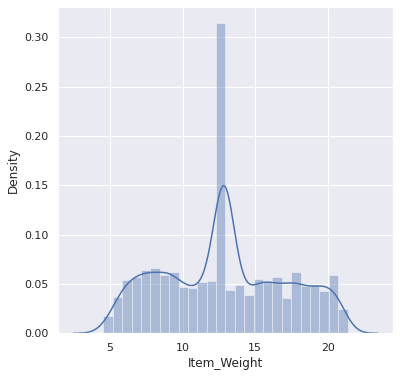

In [18]:
#Creating a histogram for the values in the 'Item Weight' column of the dataframe
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


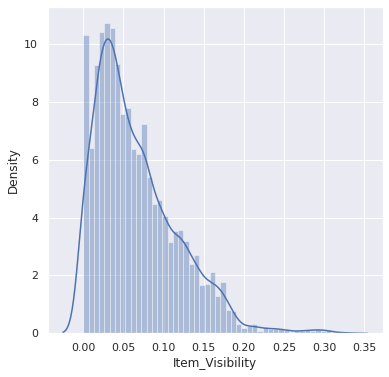

In [19]:
#Creating a histogram for the values in the 'Item Visibility' column of the dataframe
plt.figure(figsize = (6,6))
sns.distplot(df['Item_Visibility'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


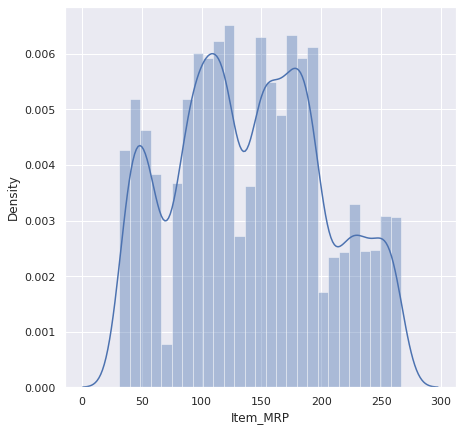

In [20]:
#Creating a histogram for the values in the 'Item MRP' column of the dataframe
plt.figure(figsize = (7,7))
sns.distplot(df["Item_MRP"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


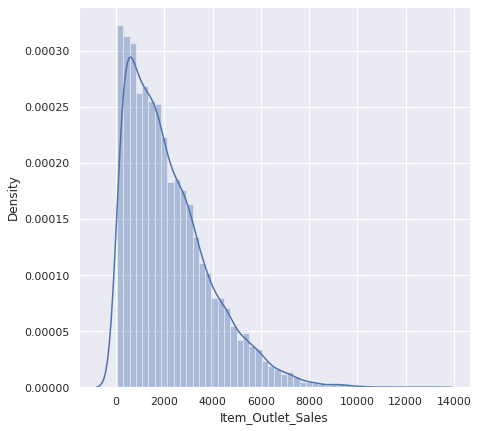

In [21]:
#Creating a histogram for the values in the 'Item Outlet Sales' column of the dataframe
plt.figure(figsize = (7,7))
sns.distplot(df["Item_Outlet_Sales"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


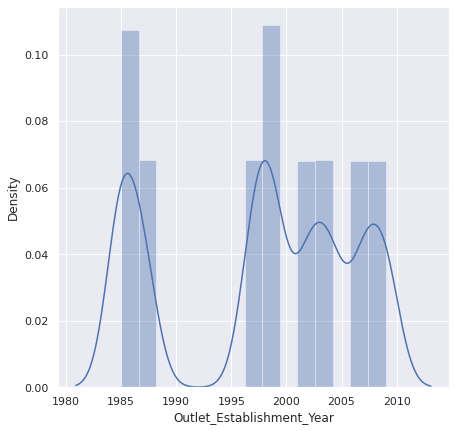

In [22]:
#Creating a histogram for the values in the 'Outlet Establishment Year' column of the dataframe
plt.figure(figsize = (7,7))
sns.distplot(df["Outlet_Establishment_Year"])

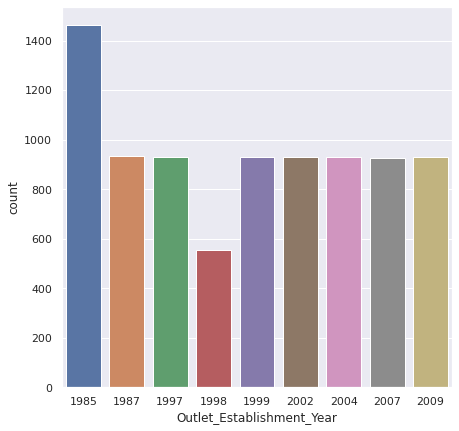

In [23]:
#Creating a Bar Graph for the values in the 'Outlet_Establishment_Year' column of the dataframe
plt.figure(figsize = (7,7))
sns.countplot(x = 'Outlet_Establishment_Year', data = df)

In [24]:
#df.drop('Item_Identifier', axis = 1, inplace = True)

In [25]:
#df.drop('Outlet_Identifier', axis = 1, inplace = True)

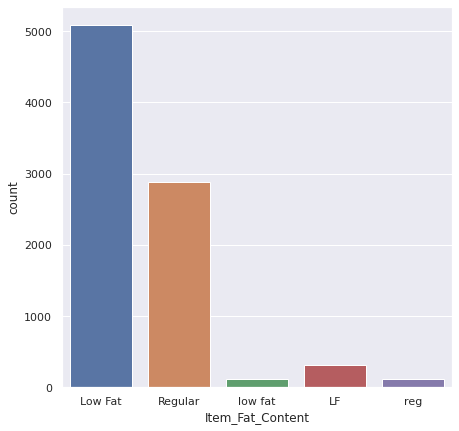

In [26]:
#Creating a Bar Graph for the values in the 'Item_Fat_Content' column of the dataframe
plt.figure(figsize = (7,7))
sns.countplot(x = 'Item_Fat_Content', data = df)

In [27]:
#Reducing the class values by eliminating label name inconsistency by replacing values in the dataframe
df['Item_Fat_Content'].replace(to_replace = 'low fat', value= 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'LF', value = 'Low Fat', inplace = True)
df['Item_Fat_Content'].replace(to_replace = 'reg', value = 'Regular', inplace = True)

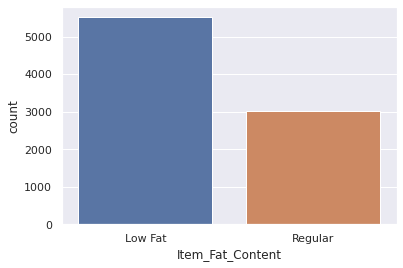

In [28]:
#Plotting the bar graph again to confirm the value replacement.
sns.countplot(x = 'Item_Fat_Content', data = df)

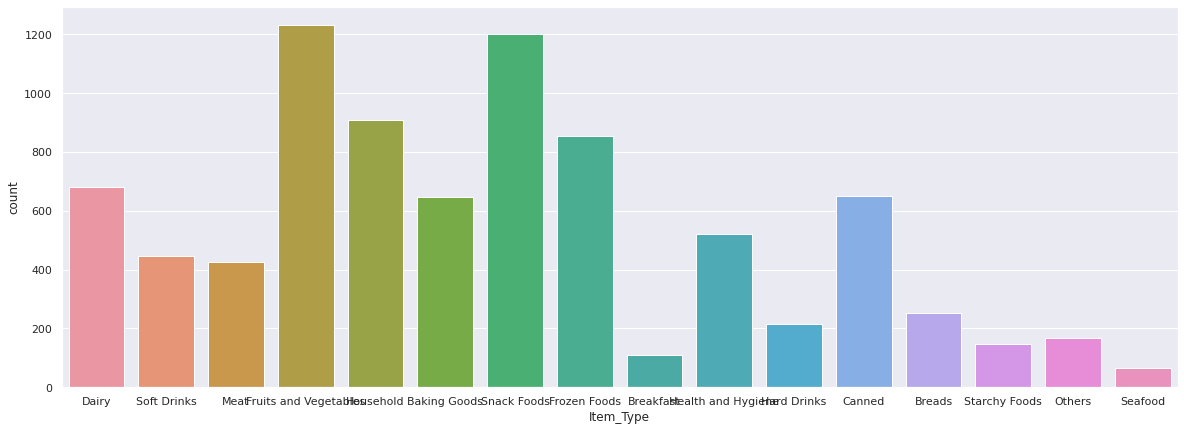

In [29]:
#Creating a Bar Graph for the values in the 'Item_Type' column of the dataframe
plt.figure(figsize = (20,7))
sns.countplot(x = 'Item_Type', data = df)

In [30]:
#Initialising an instace for encoder before performing label encoding
encoder = LabelEncoder()

In [31]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Item_Type'] = encoder.fit_transform(df["Item_Type"])
df["Item_Fat_Content"] = encoder.fit_transform(df["Item_Fat_Content"])
#df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

In [32]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700


In [33]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [34]:
#Dropping feature with low predictive power.
df.drop('Outlet_Size', axis = 1, inplace = True)

In [35]:
#Creating a label dataframe with target values to be predicted on
label = df['Item_Outlet_Sales']

In [36]:
#Creating a features dataframe with required features to predict the target variable
features = df.drop('Item_Outlet_Sales', axis = 1)

In [37]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,0,1,2097.2700


In [38]:
label.shape

(8523,)

In [39]:
features.shape

(8523, 10)

In [40]:
#Splitting the original dataframe into training and test dataframes.
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size= 0.1, random_state = 1)

In [41]:
print(features_train.shape)
print(features_test.shape)
print(label_train.shape)
print(label_test.shape)

(7670, 10)
(853, 10)
(7670,)
(853,)


In [42]:
#Initialising the instance of the chosen model type and training it on labelled examples
model = XGBRegressor()
model.fit(features_train, label_train)

[04:26:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [43]:
#Checking the model accuracy on training data
predict_train = model.predict(features_train)
accuracy_train = metrics.r2_score(label_train, predict_train)
print(round(accuracy_train,2))

0.63


In [44]:
#Checking the model accuracy on test data
predict_test = model.predict(features_test)
accuracy_test = metrics.r2_score(label_test, predict_test)
print(round(accuracy_test,2))

0.62
